## Machine Learning Quiz 2
## Submitted By: Stuti Sanghavi

## Question 1 :

### Exploratory Data Analysis

In [1]:
# Import required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
dataset = pd.read_csv('songs.csv', encoding = 'latin-1')

In [3]:
# Checking the first few rows and columns of the dataset to understand the data better
dataset.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [4]:
# There are 7574 rows and 39 columns in the dataset
dataset.shape

(7574, 39)

In [5]:
# Looking at statistical details of the dataset
dataset.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


### Question 1.1 - How many observations (songs) are there in total?


In [6]:
# Number of observations in the dataset
len(dataset)

7574

In [7]:
print('There are a total of ' + str(len(dataset)) + ' songs in the dataset')

There are a total of 7574 songs in the dataset


### Question 1.2 - How many of them are Top-10?

In [8]:
# Top10 is our y variable
y_counts = dataset['Top10'].value_counts()
y_counts

0    6455
1    1119
Name: Top10, dtype: int64

In [9]:
print('There are ' + str(y_counts[1]) + ' songs that are in the Top 10')

There are 1119 songs that are in the Top 10


### Question 1.3 - How many non Top-10?

In [10]:
print('There are ' + str(y_counts[0]) + ' songs that are not in the Top 10')

There are 6455 songs that are not in the Top 10


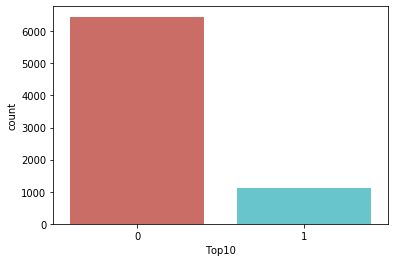

In [11]:
# Plotting the count of top10 and non top10 songs
sns.countplot(x='Top10', data= dataset, palette = 'hls')
plt.show()

In [12]:
# Getting the percentage count of songs in Top-10 and Non Top-10 songs
count_not_top10 = len(dataset[dataset['Top10']==0])
count_top10 = len(dataset[dataset['Top10']==1])
pct_of_not_top10 = count_not_top10/len(dataset)
print("The percentage of songs not in Top10 is", round(pct_of_not_top10*100, 2))
pct_of_top10 = count_top10/len(dataset)
print("The percentage of songs in Top10 is", round(pct_of_top10*100, 2))

The percentage of songs not in Top10 is 85.23
The percentage of songs in Top10 is 14.77


## Question 2 :
### How many songs does the dataset include for which the artist name is "Michael Jackson"?

In [13]:
# Filtering out dataset to include only the songs which has the artist Michael Jackson

songs_MJ = dataset[dataset.artistname == 'Michael Jackson']
songs_MJ.head(2) # Checking if the code works by looking at the artistname

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
4328,2001,You Rock My World,Michael Jackson,SOBLCOF13134393021,ARXPPEY1187FB51DF4,4,1.00,-2.768,95.003,0.892,...,120.076,-53.839,63.576,-85.169,84.840,-102.185,55.266,-48.107,56.116,1
6204,1995,She's Out of My Life,Michael Jackson,SOGYSDR12A8AE488B9,ARXPPEY1187FB51DF4,3,0.75,-16.388,93.456,0.074,...,91.880,-66.735,60.829,-64.119,47.775,-60.357,52.850,-48.775,41.972,0


In [14]:
# Getting the number of songs where Michael Jackson was the artist
len(songs_MJ)

18

In [15]:
print('There are ' + str(len(songs_MJ)) + ' songs in the dataset where artist name is Michael Jackson')

There are 18 songs in the dataset where artist name is Michael Jackson


## Question 3 :
### Split the data in "SongsTrain" and "SongsTest"

In [16]:
# Filtering dataset to get the Train data which includes all observations till 2009
# We can filter by excluding only the year of 2010, and then taking all the remaining data as the Train data

SongsTrain = dataset[dataset.year != 2010]

In [17]:
# Filtering the dataset and including only the observations having year = 2010 as the testing set

SongsTest = dataset[dataset.year == 2010]

### a) How many observations (songs) are in the training set?

In [18]:
# Getting the number of records in the Training set by using len
len(SongsTrain)

7201

In [19]:
print('There are ' + str(len(SongsTrain)) + ' observations (songs) in the training set')

There are 7201 observations (songs) in the training set


### b) How many observations (songs) are in the test set?

In [20]:
# Getting the number of records in the Testing set by using len
len(SongsTest)

373

In [21]:
print('There are ' + str(len(SongsTest)) + ' observations (songs) in the testing set')

There are 373 observations (songs) in the testing set


### Verifying the above information

In [22]:
# Verifying if Training and Testing set combine equals the total observations in the dataset
len(SongsTrain) + len(SongsTest) == len(dataset)

True

## Question 4 :
### Creating Prediction Model

### Step 1 - We want to exclude some of the variables in our dataset from being used as independent variables ("year", "songtitle", "artistname", "songID", and "artistID")

In [23]:
# Defining the train-test-split for X and y variables
# We remove variables "year", "songtitle", "artistname", "songID", and "artistID" while defining the X_train and X_test. 
# But we also remove the variable Top10 from X because that becomes our y variable
# The dataset used for X and y train and test is the SongsTrain and SongsTest

X_train = SongsTrain.drop(columns = {'year', 'songtitle', 'artistname', 'songID', 'artistID','Top10'})
y_train = SongsTrain.Top10
X_test = SongsTest.drop(columns = {'year', 'songtitle', 'artistname', 'songID', 'artistID','Top10'})
y_test = SongsTest.Top10

In [24]:
# The independent variables used in our model are:
X_train.columns

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')

In [25]:
# Out of the 7574 observations, 7201 of them are used for training the data
X_train.shape

(7201, 33)

In [26]:
# Same rows in y_train as the X_train but contains only 1 column of Top10
y_train.shape

(7201,)

In [27]:
# Remaining 373 observations used for testing dataset
X_test.shape

(373, 33)

In [28]:
# Same split as above applied on the y variable as well

y_test.shape

(373,)

### Step 2 - Build a logistic regression model to predict Top10 using the training data. You may enumerate all the remaining independent variables

In [29]:
# Build Logistic Regression Model

# At this stage, we’re ready to create our logistic regression model. 
## We’ll do this using the LogisticRegression class we imported in the beginning.

logistic_regression = LogisticRegression()
model = logistic_regression.fit(X_train, y_train)

In [30]:
# Predict

# Once model training is complete, its time to predict the data using the model. 
# For this, we’re going to use the predict method on the model and pass the x_test values for predicting. 
# We’re storing the predicted values in the y_pred variable.

y_pred = logistic_regression.predict(X_test)

### Question 5 : Our model seems to indicate that these confidence variables are significant (rather than the variables timesignature, key, and tempo themselves). What does the model suggest?

### Solution:

#### Before we can answer the above question, we need to understand the sign of the variable i.e. whether its positive or negative

In [31]:
import statsmodels.api as sm
print(sm.Logit(y_train, sm.add_constant(X_train)).fit().summary())

Optimization terminated successfully.
         Current function value: 0.330451
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7167
Method:                           MLE   Df Model:                           33
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:                  0.2091
Time:                        13:45:08   Log-Likelihood:                -2379.6
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                2.683e-243
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       14.7000      1.806      8.138      0.000      11.160

### Answer :
- We see from the summary statistics that the coefficients for confidence variables (timesignature_confidence, tempo_confidence and key_confidence) are statistically significant and are positive. This indicates that with increase in confidence variable, the chances of the song being in Top 10 is higher.
### Hence the answer is B.

### Question 6 :  In general, if the confidence is low for the time signature, tempo, and key, then the song is more likely to be complex. What does our model suggest in terms of complexity?

### Answer: 
- We know that if the confidence is low then the song is more complex, however since the coefficient values for confidence variables (timesignature_confidence, tempo_confidence, and key_confidence) are all positive, implies higher confidence leads to the song being less complex. Since higher confidence leads to a higher predicted probability of a song being a hit, the mainstream listeners prefer songs with higher confidence and hence less complex songs. 
### So the answer is B

### Question 7: Songs with heavier instrumentation tend to be louder (have higher values in the variable "loudness"). By inspecting the coefficient of the variable "loudness", what does our model suggest?


### Answer:
- The coefficient estimate for loudness is positive, meaning that mainstream listeners prefer louder songs, which are those with heavier instrumentation.

### So the answer is A

## Question 8 
### What is the accuracy of our model on the test set (Compute the accuracy as a number between 0 and 1.)

In [32]:
# Finding Accuracy

# We need to find the accuracy of our model in order to evaluate its performance. 
# For this, we’ll use  the accuracy_score method of the metrics class, as shown below:

accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the model on test data is ' + str(round(accuracy,4)))

The accuracy of the model on test data is 0.8686


## Calculating Confusion Matrix

In [33]:
# Generating a confusion matrix using our test set for actual and predicted y values
cm_test = confusion_matrix(y_test, y_pred)

In [34]:
# Printing the confusion matrix
cm_test

array([[313,   1],
       [ 48,  11]], dtype=int64)

In [35]:
# Getting the value counts of y_test(for understanding actual values in the confusion matrix)
y_test.value_counts()

0    314
1     59
Name: Top10, dtype: int64

- A true positive is an outcome where the model correctly predicts the positive class. 
- Similarly, a true negative is an outcome where the model correctly predicts the negative class.
- A  false positive is an outcome where the model incorrectly predicts the positive class.
- And a false negative is an outcome where the model incorrectly predicts the negative class

In [36]:
# After getting the confusion matrix and identifying the information from above, we get each value as:
print('The True Positive (TP) value in the confusion matrix is '+ str(cm_test[1][1]))
print('The True Negative (TN) value in the confusion matrix is '+ str(cm_test[0][0]))
print('The False Positive (FP) value in the confusion matrix is '+ str(cm_test[0][1]))
print('The False Negative (FN) value in the confusion matrix is '+ str(cm_test[1][0]))

The True Positive (TP) value in the confusion matrix is 11
The True Negative (TN) value in the confusion matrix is 313
The False Positive (FP) value in the confusion matrix is 1
The False Negative (FN) value in the confusion matrix is 48


## Question 9 :
### What is the True Positive Rate of our model on the test set?

* True Positive Rate = TP / (TP + FN)

In [37]:
print('The True Positive Rate is ' + str(round(11/(48+11),4)))

The True Positive Rate is 0.1864


## Question 10 :
### What is the False Positive Rate of our model on the test set?

- False Positive Rate =  (FP) / (FP + TN)

In [38]:
print('The False Positive Rate is ' + str(round(1/(313+1),4)))

The False Positive Rate is 0.0032
